<a href="https://colab.research.google.com/github/DarkMagicianK/MLpracticos2022/blob/main/%20/Practicos/ML_2022_Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio N°1.1 - Casos covid
---
En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.

a) Hay variables que puedan ser razonablemente consideradas normales?

b) Hay variables que tienen un comportamiento sospechoso?

In [20]:
# Librerias 
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import data_table
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import norm

# Seteo de variables
url_file = 'https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv'
url_file = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
data_covid = pd.read_csv(url_file)
namecols = data_covid.columns

data_table.enable_dataframe_formatter()
data_covid
#data_table.disable_dataframe_formatter()


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


NameError: ignored

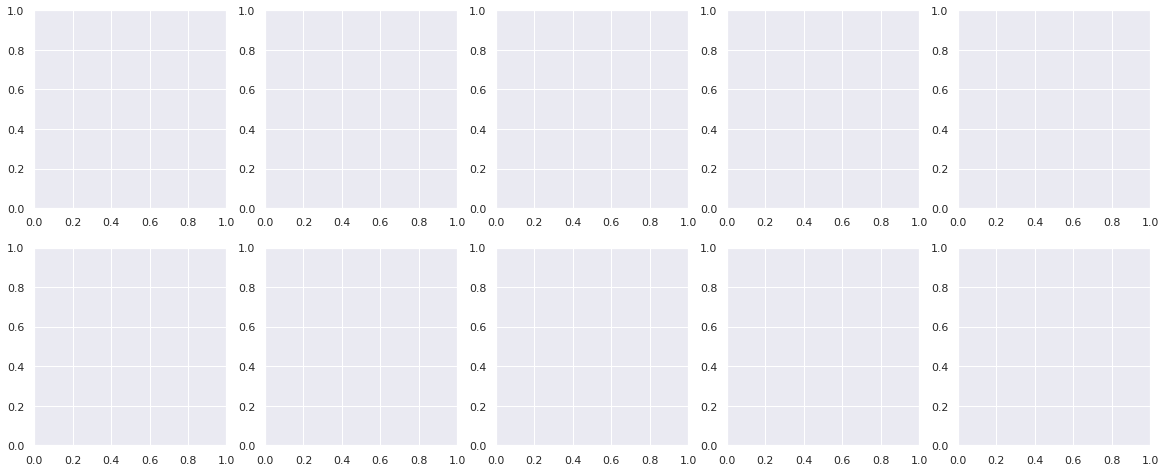

In [17]:
# Plots de cols respecto al tiempo
#sns.pairplot(data_covid,diag_kind="kde")

_, ax1 = plt.subplots(2,5, figsize = ( 20, 8));
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_covid, ax=ax1[ax_row][i%5])

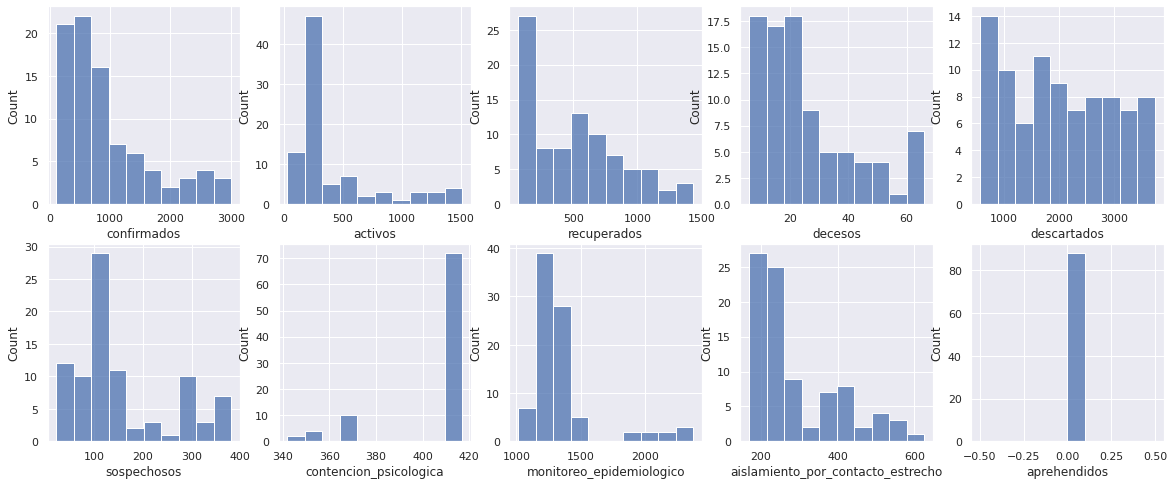

In [ ]:
# Histogramas de cols
_, ax2 = plt.subplots(2,5, figsize = ( 20, 8))
ax_row = -1;
for i in range(10):
  if (i%5 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_covid, bins=10, ax=ax2[ax_row][i%5])

# Conclusiones
---
a) Según los plots e histogramas obtenidos, ninguna variable presenta indicios de una distribución normal.
Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

b)
Comportamiento sospechoso: La variable,

** contencion_psicologica*: presenta dos cluster definidos. Puede deberse a la saturación del equipo de trabajo.

** monitoreo_epidemiologico*: presenta dos cluster definidos tambien. En epoca de crecemiento de casos de covid, puede que la baja a la mitad practicamente se deba a una politica ministerial. En uno de los clusters se exhibe un comportamiento gausiano.


# Ejercicio N°1.2 - Camas covid
---

NameError: ignored

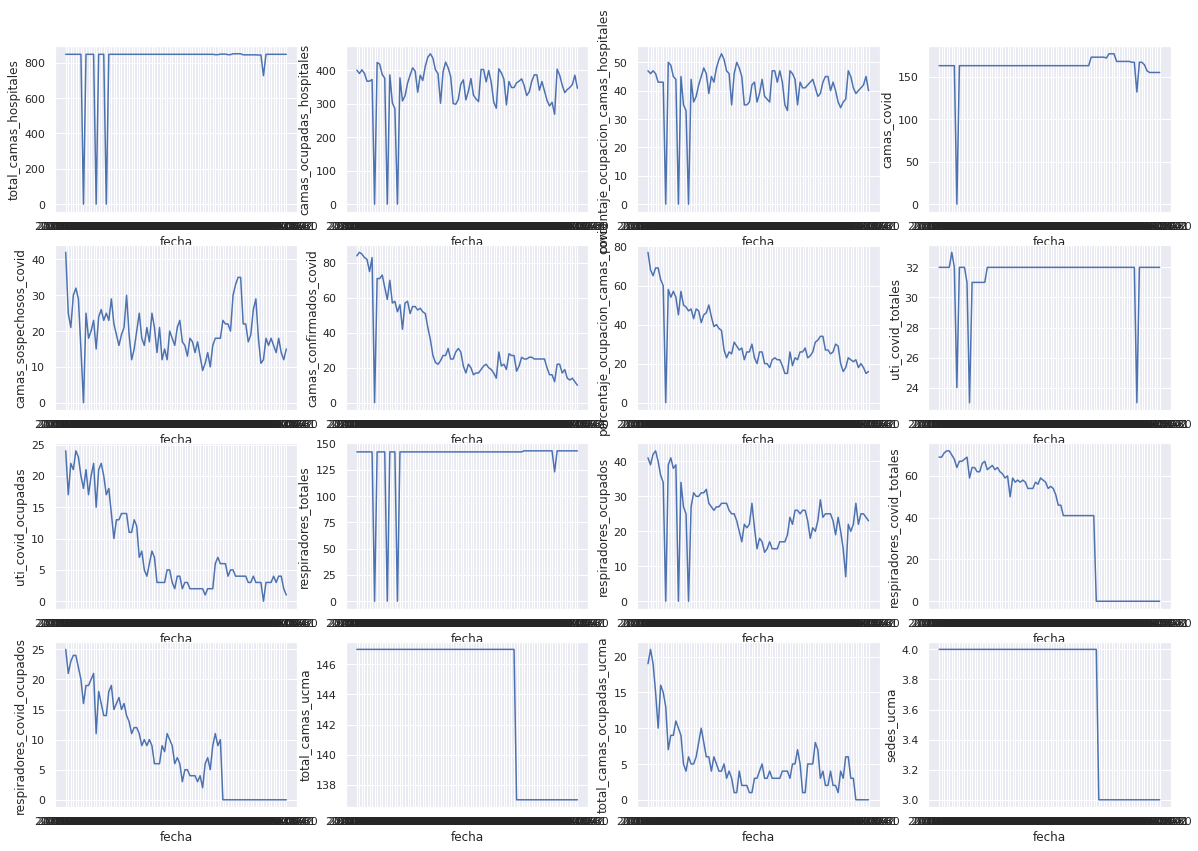

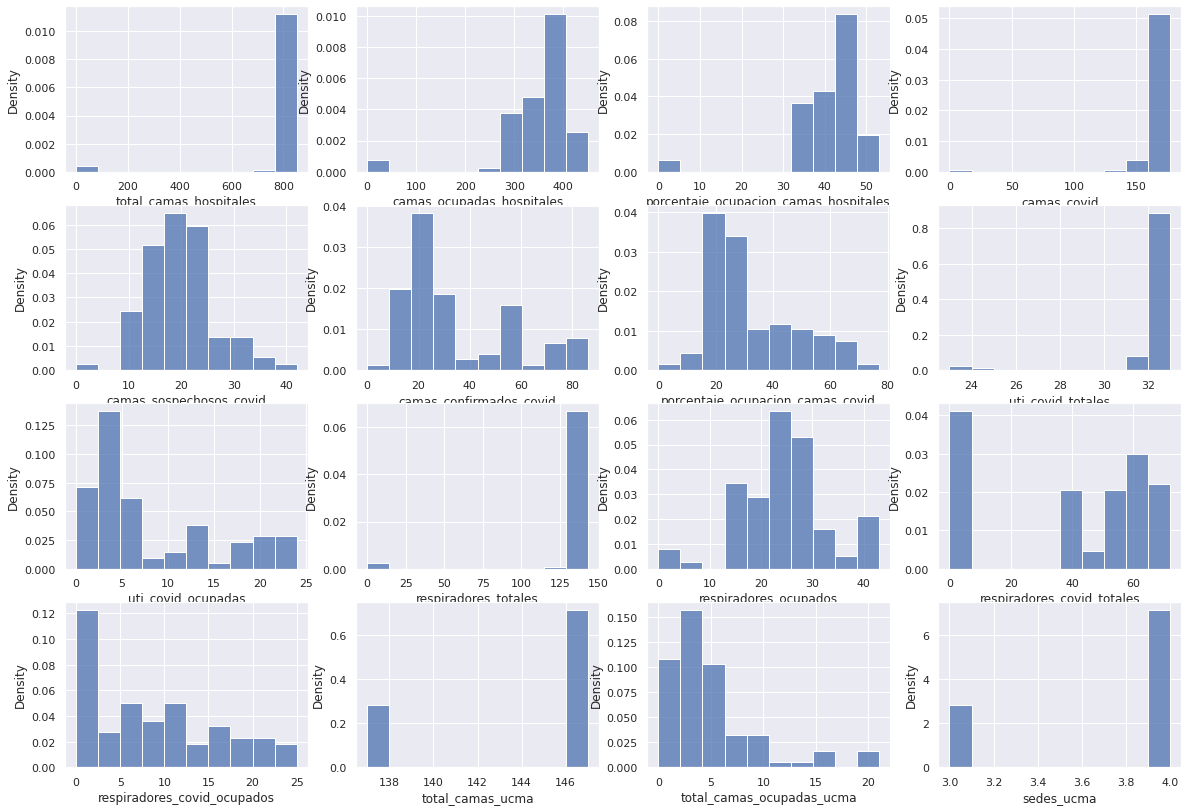

In [19]:
#%% Ejercicio N°1 -Camas covid
url_file_camas = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv';
data_camas = pd.read_csv(url_file_camas);
namecols = data_camas.columns;
#data_table.enable_dataframe_formatter()
data_camas

def ajuste_norm(data,ax):
    mu, std = norm.fit(data);
    xmin,xmax = ax.get_xlim();
    x = np.linspace(xmin, xmax, 50);
    p = norm.pdf(x, mu, std);
    ax.plot(x, p, 'k', linewidth=2)

del data_camas[namecols[0]];
namecols = data_camas.columns;
orden = data_camas.shape;
nro_cols = orden[1];
#
#sns.pairplot(data_camas,diag_kind="kde")
# Plots de cols respecto al tiempo
_, ax1 = plt.subplots(4,4, figsize = ( 20, 14));
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.lineplot(x="fecha", y=namecols[i+1],data=data_camas, ax=ax1[ax_row][i%4])

#
# Histogramas de cols
_, ax2 = plt.subplots(4,4, figsize = ( 20, 14))
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  sns.histplot(x=namecols[i+1],data=data_camas, bins=10,stat='density', ax=ax2[ax_row][i%4])  

# Ajute normal
ax_row = -1;
for i in range(nro_cols-2):
  if (i%4 ==0): ax_row = ax_row +1
  ajuste_norm(data_camas[namecols[i+1]],ax2[ax_row][i%4])  

#sns.pairplot(data_camas,diag_kind="kde")

# Conclusiones
---
a) Según los histogramas obtenidos, "camas_ocupadas_hospitales",camas_sospechosos_covid", presentan a priori una distribución normal sobre su soporte(descartando los outliers por datos faltantes).
** Podria decirse que la variable, *descartados* presenta una tendencia a una distribucion uniforme.

b)


# Ejercicio N°2
Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).
Recalcular para algunas variantes (por ejemplo, acercando las medias de los grupos A y B, cambiando el valor umbral, etc.).
Cómo podrían hacer no supervisado este proceso?

Text(0.5, 1.0, 'Clase B')

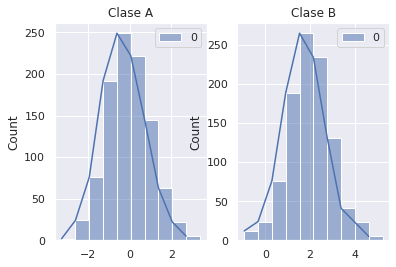

In [10]:
#@title Generación de las dos clases
#import inspector
#inspector.watch_globals()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")


# Funciones adicionales
def clasificador(datos,T):
    prediccion = np.zeros(datos.shape);
    prediccion[datos > T] = 1;
    return(prediccion);

def indicadores(clase,prediccion,N):
    # np.sum(prediccion): cant. total de detecciones + (suma predicciones positivas))
    # N:                  cant. total casos correctos (suma de condiciones positivas)

    TP = np.sum( np.logical_and(clase,prediccion));
    PP = np.sum(prediccion > 0.5)
    Precision = TP/PP; 
    Sensibilidad = TP/N;
    return((Precision,Sensibilidad))    
    
# Generacón de Datos Sinteticos
N = 1000; # Cantidad de datos
[muA, sigmaA] = [0, 1]; # media y desvio estandar
[muB, sigmaB] = [2, 1]; # media y desvio estandar
datosA = np.random.normal(muA, sigmaA, size=(N,1)); #creando muestra de datosA
datosB = np.random.normal(muB, sigmaB, N)[:,None]; #creando muestra de datosB
claseA = np.zeros(datosA.shape);
claseB = np.ones(datosB.shape);
Datos = np.concatenate((datosA,datosB));
Clases = np.concatenate( (claseA,claseB) );
Predicciones = np.zeros(Clases.shape);
#%%
# Graficando histograma
# histograma de distribución normal.
_,ax = plt.subplots(1,2)
sns.histplot(data=datosA, bins=10, ax=ax[0])
sns.histplot(data=datosB, bins=10, ax=ax[1])
#_,ax1 = plt.subplots(1,2)
countA,xA = np.histogram(datosA);
countB,xB = np.histogram(datosB);
ax[0].plot(xA[0:len(xA)-1],countA);
ax[1].plot(xB[0:len(xB)-1],countB);

ax[0].set_title('Clase A')
ax[1].set_title('Clase B')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


Text(0.5, 1.0, 'Precisión vs Recall')

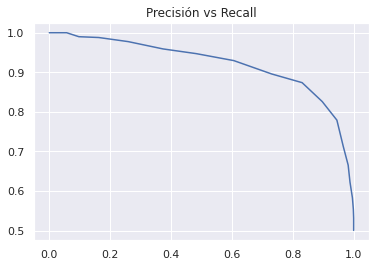

In [15]:
# Clasificación e indicadores
T_vec = np.linspace(Datos.min(), Datos.max(),30);
Precision = np.zeros(T_vec.shape);
Sensibilidad = np.zeros(T_vec.shape);
  
for i in range(T_vec.size):
    T = T_vec[i];
    Predicciones = clasificador(Datos,T);
    # Indicadores
    pys = indicadores(Clases,Predicciones,N); # N es  ant. total casos correctos (suma de condiciones positivas)
    Precision[i] = pys[0];
    Sensibilidad[i] = pys[1];

plt.plot(Sensibilidad,Precision);
plt.title('Precisión vs Recall')


#%%
#sns.pairplot(data_covid,diag_kind="kde")